#**LSTM con Keras (Microsoft Stock)**

In [ ]:
import pandas as pd
Data=pd.read_csv('Microsoft_Stock.csv')
Data.head(50)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


Quiero predecir el precio de cierre de las acciones de Microsoft con datos de precios pasados.

In [ ]:
#Defino mi objetivo y lo escalo ya que quiero evitar el desbordamiento debido a que uso funciones de activación como la sigmoide qeu comprenden valores entre 0 y 1
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

dataset = Data[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)



In [ ]:
# Divido en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(len(dataset) * 0.8)
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
#Creo una secuencia de entrada para mi modelo con lookback de 10
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0] #El cero es porque solo nos hemos quedado con  la columna close
        X.append(a)  # Agrego la secuencia 'a' a la lista X
        Y.append(dataset[i + look_back, 0])  # Agrega el valor objetivo a la lista Y
    return np.array(X), np.array(Y)

In [ ]:
look_back = 10 # Ajusta según tus necesidades
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Definimos los parámetros

look_back = 10 # Longitud del vector de entrada o lookback
hidden_size = 50  # Número de neuronas en la capa LSTM
output_size = 1   # Tamaño de la salida (por ejemplo, para tareas de regresión)
# sequence_length = 10  Longitud de la secuencia de entrada ya definido por lookback

# Creamos el modelo secuencial
model = Sequential()

# Añadimos una capa LSTM
# units: tamaño de la capa oculta, input_shape: forma de la entrada (longitud de la secuencia, tamaño de entrada)
model.add(LSTM(hidden_size, input_shape= (look_back,1)))

# Remodela la entrada para que sea [muestras, pasos de tiempo, características]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Añadimos una capa de salida densa
model.add(Dense(output_size))

# Compilamos el modelo con minimos cuadrados y el optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo con los datos generados
model.fit(X_train,Y_train, epochs=100, batch_size=32)

# Realizamos una predicción con el modelo
Train_predictions_scaled = model.predict(X_train)
Test_predictions_scaled = model.predict(X_test)

#Revierto el escalado para tener las unidades originales
Train_predictions = scaler.inverse_transform(Train_predictions_scaled)
Test_predictions = scaler.inverse_transform(Test_predictions_scaled)

# Mostrar las dimensiones de la salida
print("Dimensiones de Train_predictions:", Train_predictions.shape)
print("Dimensiones de Test_predictions:", Test_predictions.shape)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0362
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7582e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4240e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2195e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1139e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1678e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0914e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.6086e-05
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.7094e-05
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8206e-05
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9684e-05
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7458e-05
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3106e-05
Epoch 15/100
38/38 ━━━━━━━━━━━━━━

Train RMSE: 0.0081
Test RMSE: 0.0281
Train R^2: 0.9973
Test R^2: 0.9467


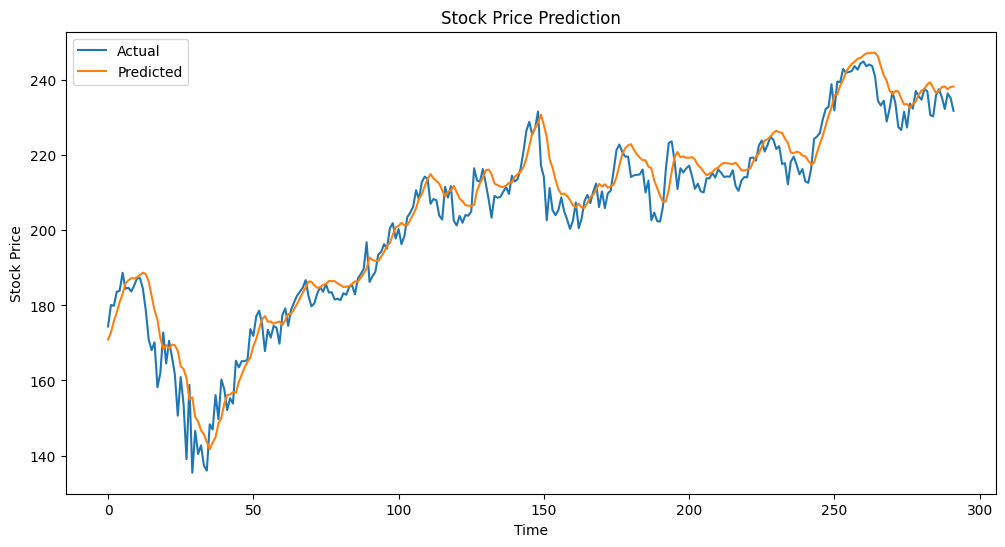

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# ... (your existing code) ...

# Calculate performance metrics
train_rmse = np.sqrt(mean_squared_error(Y_train, Train_predictions_scaled))
test_rmse = np.sqrt(mean_squared_error(Y_test, Test_predictions_scaled))
train_r2 = r2_score(Y_train, Train_predictions_scaled)
test_r2 = r2_score(Y_test, Test_predictions_scaled)

print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Train R^2: {train_r2:.4f}')
print(f'Test R^2: {test_r2:.4f}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(Y_test.reshape(-1,1)), label='Actual')
plt.plot(Test_predictions, label='Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.3235e-05 - val_loss: 6.9193e-04
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6662e-05 - val_loss: 6.9440e-04
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7078e-05 - val_loss: 7.2738e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6802e-05 - val_loss: 6.6263e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.9450e-05 - val_loss: 6.8184e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.1477e-05 - val_loss: 7.0566e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7264e-05 - val_loss: 6.4636e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.9180e-05 - val_loss: 6.3998e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.1429e-05 - val_loss: 6.3217e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1663e-05 - val_loss: 7.3469e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7350e-

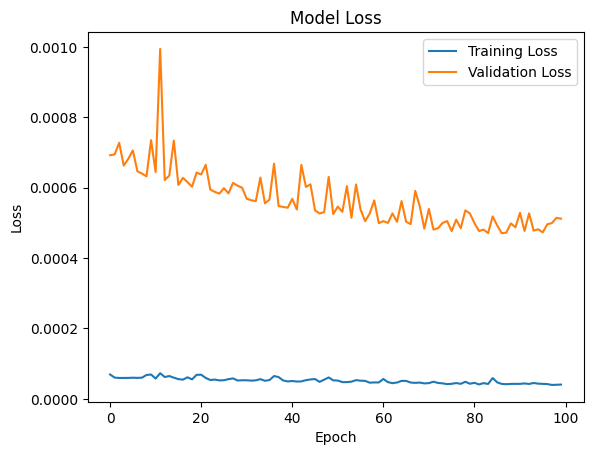

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# ... (your existing code for data preparation and model creation) ...

# Train the model and store the history
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## **Training Loss**

**What it is**: Training loss is the error calculated during the training process on the training dataset. It represents how well your model is learning to predict the target values (stock prices in this case) based on the training data it's seen so far.

**How it's calculated:** For each batch of training data, the model makes predictions, and the difference between those predictions and the actual values is measured using a loss function (e.g., mean squared error). This loss is then used to update the model's weights and biases to improve its performance.

## **Validation Loss**

**What it is:** Validation loss is the error calculated on a separate dataset called the validation dataset, which is not used during training. It provides an estimate of how well your model will generalize to unseen data.

**How it's calculated:** After each epoch of training, the model's performance is evaluated on the validation dataset. The loss is calculated in the same way as training loss but using the validation data instead.

It makes sense that the validation loss graph is slightly higher than the trainig loss as it is defined in a new unseen set of data to show it's prediction power.
Their differences are around one tenth power wich is very low and indicative of good prediction capability.

**Conclusión del modelo LSTM**: Mi modelo  recibe como entrada una secuencia de precios de cierre de las acciones (lookback de 10 días en este caso) y, a partir de esta información, predice el precio de cierre para el siguiente día. La capa LSTM procesa la secuencia de entrada, actualizando su estado interno en cada paso de tiempo, y finalmente produce una salida que representa la predicción del precio.

Si nos fijamos en las métricas obtenidas RMSE y R^2 Se obtenieron RMSEs Bajos tanto para el conjunto de entrenamiento como el de prueba, junto con un R^2 por encima del 90% podemos decir que el modelo es un éxito en la predicción. Además de esto fijándonos en la gráfica del precio en conjunto con el estimado por nuestro modelo podemos ver que sigue perfectamente la tendecia aunqeu en algunos puntos pueda discrepar por algunos centavos de dolar.

Obviamente no tenemos un modelo perfecto pero se podría utilizar como una base sólida para modelos avanzados de predicción del precio de las acciones.

# **Red neuronal Convolucional (CNN) clasificación de imágenes**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

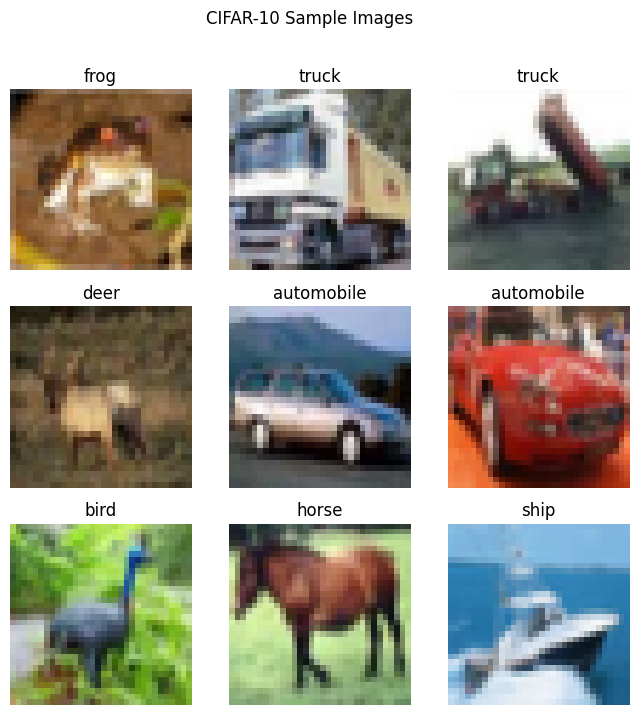

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code to load and preprocess CIFAR-10) ...

# Display a few sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle('CIFAR-10 Sample Images')

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])  # Display the image
    ax.set_title(class_names[y_train[i][0]]) # Show the class label as the title
    ax.axis('off')  # Remove the axes

plt.show()

Para la CNN que estás construyendo con CIFAR-10, la capa Flatten se encarga del reshape necesario para aplanar la imagen de entrada en un vector unidimensional. No necesitas hacer un reshape adicional con np.reshape.

Cargo y preproceso los datos normalizando los datos y definiendo una salida categórica

##Arquitectura CNN

### Capa Convolucional

In [ ]:
#defino mi capa convolucional con su subcapas
from tensorflow.keras.layers import Conv2D

# Define la capa convolucional
conv_layer1 = Conv2D(
    filters=32,  # Número de filtros (kernels)
    kernel_size=(3, 3),  # Tamaño del kernel (3x3 en este caso)
    activation='relu',  # Función de activación (ReLU)
    input_shape=(32, 32, 3)  # Forma de la entrada (imágenes CIFAR-10 de 32x32 con 3 canales de color)
)
#Defino una segunda capa convolucional
conv_layer2= Conv2D(
    filters=64,  # Número de filtros (kernels)
    kernel_size=(3, 3),  # Tamaño del kernel (3x3 en este caso)
    activation='relu',  # Función de activación (ReLU)
    input_shape=(32, 32, 3)
)
conv_layer3= Conv2D(
    filters=128,  # Número de filtros (kernels)
    kernel_size=(3, 3),  # Tamaño del kernel (3x3 en este caso)
    activation='relu',  # Función de activación (ReLU)
    input_shape=(32, 32, 3)
)
conv_layer3= Conv2D(
    filters=256,  # Número de filtros (kernels)
    kernel_size=(3, 3),  # Tamaño del kernel (3x3 en este caso)
    activation='relu',  # Función de activación (ReLU)
    input_shape=(32, 32, 3)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Capa MAxPooling

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

# Define la capa Max Pooling
max_pooling_layer = MaxPooling2D(pool_size=(2, 2))

Para Añadir una capa Densa o FullyConnected necesito aplanar las demás capas convolucionales (ConV1,ConV2 y MaxPooling)

### Capa Plana (Flatten)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten

Plana=Flatten()

### Capa Dense o Fully Connected

In [ ]:
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001))) #  Capa Fully connected con regularizaciones
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))

### Capa de salida

In [ ]:
#Es otra capa dense pero con 10 neuronas, igual al número de salidas en mi clasificación
from tensorflow.keras.layers import Dense

output_layer_fullycon = Dense(10, activation='softmax')

### Defino mi modelo secuencial y le añado las capas que he definido

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()  # Defino el modelo

# Añado todas las capas
model.add(conv_layer1)
model.add(max_pooling_layer)
model.add(Dropout(0.3))
model.add(conv_layer2)
model.add(max_pooling_layer)
model.add(Dropout(0.3))
# Third convolutional layer included back
model.add(conv_layer3)
model.add(max_pooling_layer)
model.add(Dropout(0.3))
# Added a fourth convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same',
                 kernel_regularizer=l2(0.001)))  # Regularization added here
#Potentially another max pooling could be added but it would probably give a dimensionality error
# model.add(max_pooling_layer)

# Added Dropout layer
model.add(Dropout(0.3))  # Dropout rate of 0.3

model.add(Plana)
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001))) # Regularization added here
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  # Regularization added here
model.add(Dropout(0.3))
model.add(output_layer_fullycon)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 256)           │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 2, 2, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 832,394 (3.18 MB)

 Trainable params: 832,394 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

### Entreno el modelo y grafico la pérdida y precisión en el entrenamiento y en la prueba

In [ ]:

from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape)
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


(50000, 32, 32, 3)


In [ ]:

#Entreno mi modelo con mis datos de entrenamiento y la valido con mis datos test
batch_size = 256
epochs = 100
total_train_samples = train_images.shape[0]  # Total number of training samples
steps_per_epoch = total_train_samples // batch_size
#Compilo mi modelo con la pérdica de Crissentropy, el optimizador y la métrica de precisión
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history= model.fit(train_images, train_labels, batch_size=batch_size, steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.1831 - loss: 2.4083 - val_accuracy: 0.4050 - val_loss: 1.7307
Epoch 2/100
  1/195 ━━━━━━━━━━━━━━━━━━━━ 59s 307ms/step - accuracy: 0.3625 - loss: 1.7036

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.3625 - loss: 1.7036 - val_accuracy: 0.4052 - val_loss: 1.7321
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.3842 - loss: 1.7248 - val_accuracy: 0.4845 - val_loss: 1.5205
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.4875 - loss: 1.5617 - val_accuracy: 0.4533 - val_loss: 1.6197
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.4727 - loss: 1.5391 - val_accuracy: 0.5402 - val_loss: 1.3557
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.4625 - loss: 1.5106 - val_accuracy: 0.5309 - val_loss: 1.3608
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.5082 - loss: 1.4697 - val_accuracy: 0.5677 - val_loss: 1.2914
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.3500 - loss: 1.6282 - val_accuracy: 0.5657 - val_loss: 1.2912
Epoch 9/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.5489 - loss: 1.3694 - val_accuracy

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")
print(f"Loss: {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7662 - loss: 0.8309
Accuracy: 0.7652
Loss: 0.8341


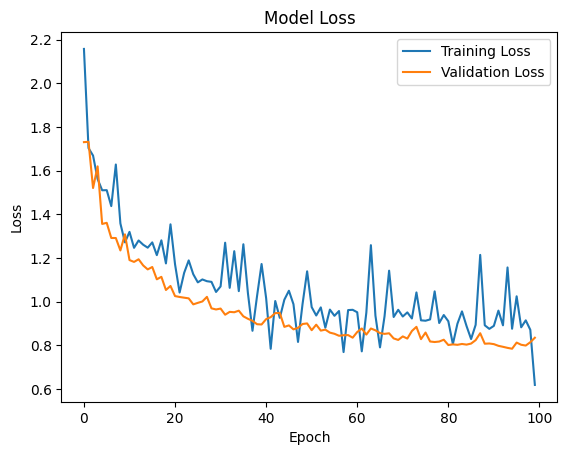

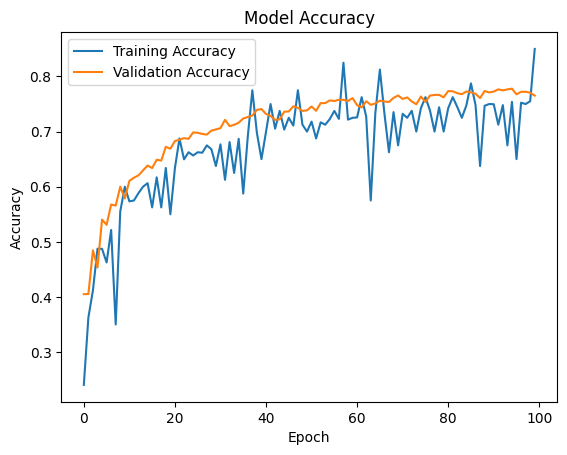

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Conclusión:** Si hacemos una revisión de la arquitectura de mi modelo podemos decir qeu es un modelo completo. El modelo cuenta con diversas capas de extracción de características con diversos filtros para captar los patrones de las imágenes, además de esto se han incluido capas max pooling tras cada una para reducir la dimensionalidad y darle robustez.

He utilizado capas Dropout para poder prevenir el overfitting y una regularización para prevenir y penalizar el modelo en caso de tendecia al sobreajuste.

Por último una capa de salida con la función softmax para crear una distribución de probabilidad cada tipo de imagen.

Si nos fijamos en las métricas de la clasificación de nuevas imágenes tenemos una accuracy del 77% y un valor de la pérdida por entropía cruzada de 0.83. Estos valores junto a la representación gráfica de su evolución sobre las epochs indican que es un modelo con mucha robustez y que clasifica con éxito la mayoría de las imágenes aun tenido en cuenta su complejidad.

También cabe recalcar que el modelo tiene margen de mejora y que seguramente añadiendo más epochs y teniendo una mayor eficiencia computacional podríamos llegar a un modelo de clasificación casi perfecto.

